# Introduction to Data Analasys
## HW 2
##### Presenters:
Roi Maskalik, 212234637 <br>
Dvir Twito, 324270883

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hw_df = pd.read_csv("HW2-Data.csv")

### Question 1
There are 2 courses listed in the dataset: Math and Portuguese

In [24]:
df_gb_class = hw_df.groupby('class')
courses = df_gb_class.groups.keys()
print(f"There are {len(courses)} courses listed in the dataset.")
courses


There are 2 listed in the dataset.


dict_keys(['Math', 'Portuguese'])

### Question 2

### Question 3
There are 395 students in Math course, and 649 students in Portuguese course.

In [30]:
df_gb_class.count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
class,,,,,,,,,,,,,,,,,,,,,
Math,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
Portuguese,649,649,649,649,649,649,649,649,649,649,...,649,649,649,649,649,649,649,649,649,649


### Question 4


### Question 5
The histogram of the students’ ages presented below.
We crated it by taking the grouping the dataset by age, and then taking the count of an arbitrary column
(because we saw that each column has the same count).

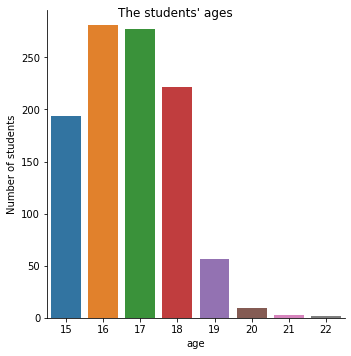

In [83]:
df_gb_ages = hw_df.groupby('age', as_index=False)
ages_count_df = df_gb_ages.count()[['age', 'school']].rename(columns={'school':'students_num'})
ages_hist = sns.catplot(kind='bar', data=ages_count_df, x='age', y='students_num')
ages_hist.fig.suptitle("The students' ages")
ages_hist.set(ylabel="Number of students")

### Question 6

### Question 7

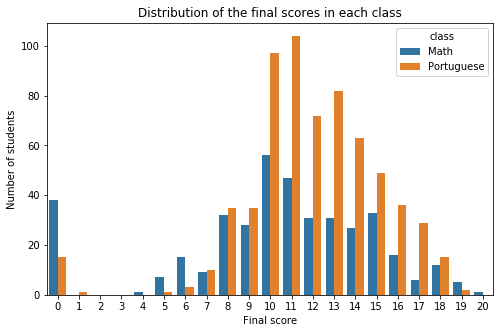

In [269]:
# Create array of all possible scores
optional_grades = np.arange(0, 21)

# Set the size of the plot
plt.figure(figsize=(8, 5))

# Plot the scores distribution
grades_count_plot = sns.countplot(data=hw_df, x='G3', hue='class', order=optional_grades)

# Set the title and the labels
grades_count_plot.set(xlabel="Final score", ylabel='Number of students',
                      title="Distribution of the final scores in each class")

# Show the plot
plt.show()

### Question 8

### Question 9
We created two side by side box plots which represent the final scores in the extra paid classes and the non extra paid clsses.

In the plots we can see that the scores in the non extra paid classes are a little bit higher. For example, the mean, the median, the munimum score and the maximum score are higher in the non extra paid classes.<br>
However, those differences are very minor, so we can't conclude whether or not there is an association.

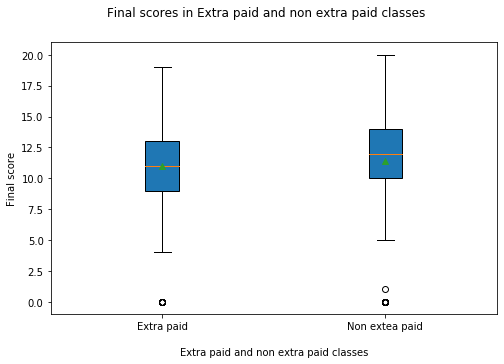

In [268]:
# Get the series of final scores
paid_class_grades = hw_df[hw_df['paid'] == 'yes']['G3']
non_paid_class_grades = hw_df[hw_df['paid'] == 'no']['G3']

# Create the box plots
fig, axs = plt.subplots()
axs.boxplot([paid_class_grades, non_paid_class_grades], labels=['Extra paid', 'Non extea paid'],
            showmeans=True, patch_artist=True)

# Set the lables of the axes
plt.xlabel('\nExtra paid and non extra paid classes')
plt.ylabel('Final score')

# Add a title
fig.suptitle("Final scores in Extra paid and non extra paid classes")

# Enlarge the size of the plot, so the differences can be easier spotted
fig.set_size_inches(8,5)

# Show the plot
plt.show()

### Question 10

### Question 11
We created a bar plot which presents the number of students drinking during the weekdays and the weekends, for each level of alcohol consumption.
We can learn from the plot that most of the students who drink more than a little bit, do it during the weekends. Thus, we can conclude that it is more plausible that students will drink during the weekends rather than during the weekdays.

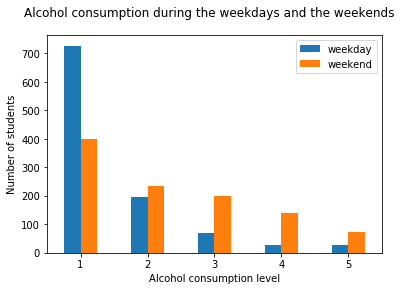

In [267]:
# Create dataframe for the weekdays
df_gb_dalc = hw_df.groupby('Dalc', as_index=False)
weekday_alcohol_df = df_gb_dalc.count()[['Dalc', 'school']].rename(columns={'Dalc':'consumption', 'school':'weekday'})

# Create dataframe for the weekendss
df_gb_walc = hw_df.groupby('Walc', as_index=False)
weekend_alcohol_df = df_gb_walc.count()[['Walc', 'school']].rename(columns={'Walc':'consumption', 'school':'weekend'})

# Merge the dataframes
alcohol_df = weekday_alcohol_df.merge(weekend_alcohol_df, on='consumption')

# Crate the plot
fig, axs = plt.subplots()
alcohol_df.plot(kind='bar', x='consumption', y=['weekday', 'weekend'], ax = axs)

# Rotate the tick marks in the x axis
axs.tick_params('x',labelrotation=0)

# Set the lables of the axes
plt.xlabel('Alcohol consumption level')
plt.ylabel('Number of students')

# Add a title
fig.suptitle("Alcohol consumption during the weekdays and the weekends")

# Show the plot
plt.show()

### Question 12

### Question 13

### Question 14